<a href="https://colab.research.google.com/github/rimanoble04/DS-tutorial/blob/main/tutorial-3/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

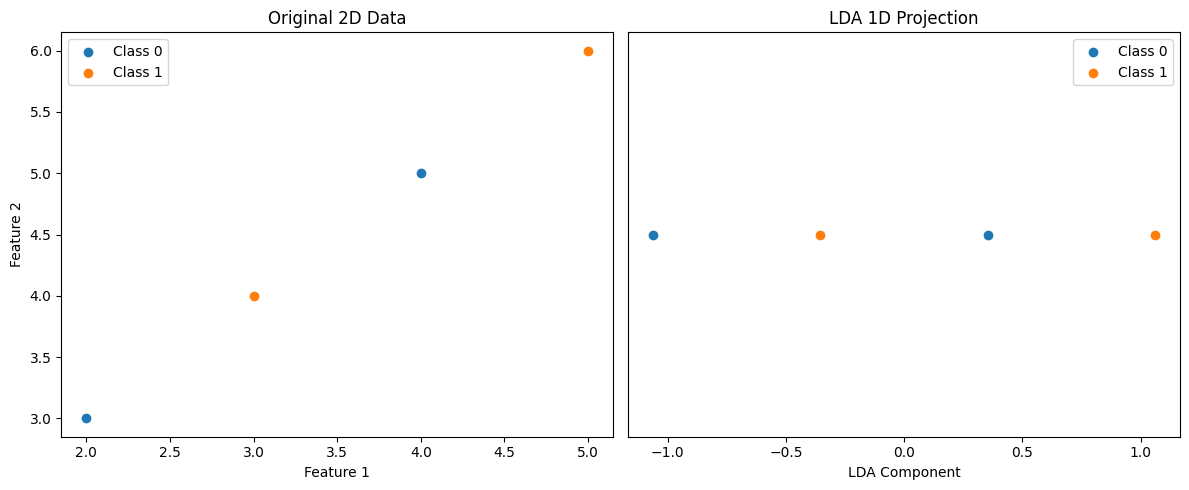

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Sample data
X = np.array([[2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 1, 0, 1])

# LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
X_lda = lda.transform(X)

# Plot the original 2D data
plt.figure(figsize=(12, 5))

# Subplot 1: Original 2D space
plt.subplot(1, 2, 1)
for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {label}")
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Subplot 2: LDA 1D projection
plt.subplot(1, 2, 2)
for label in np.unique(y):
    plt.scatter(X_lda[y == label], np.zeros_like(X_lda[y == label]), label=f"Class {label}")
plt.title("LDA 1D Projection")
plt.xlabel("LDA Component")
plt.yticks([])  # Remove y-axis as it's 1D
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
#without library

# Step 1: Data and Labels
X = np.array([[2, 3],
              [3, 4],
              [4, 5],
              [5, 6]])

y = np.array([0, 1, 0, 1])

# Step 2: Separate by class
X0 = X[y == 0]
X1 = X[y == 1]

# Step 3: Compute means
mean0 = np.mean(X0, axis=0)
mean1 = np.mean(X1, axis=0)

# Step 4: Within-class scatter
S0 = (X0 - mean0).T @ (X0 - mean0)
S1 = (X1 - mean1).T @ (X1 - mean1)
Sw = S0 + S1

# Step 5: Between-class scatter
mean_diff = (mean0 - mean1).reshape(-1, 1)
Sb = mean_diff @ mean_diff.T

# Step 6: Solve for projection vector
w = np.linalg.pinv(Sw) @ (mean0 - mean1)

# Step 7: Project data onto LDA line
X_lda = X @ w

print("Projection vector w:", w)
print("1D Transformed Data:\n", X_lda)

Projection vector w: [-0.125 -0.125]
1D Transformed Data:
 [-0.625 -0.875 -1.125 -1.375]


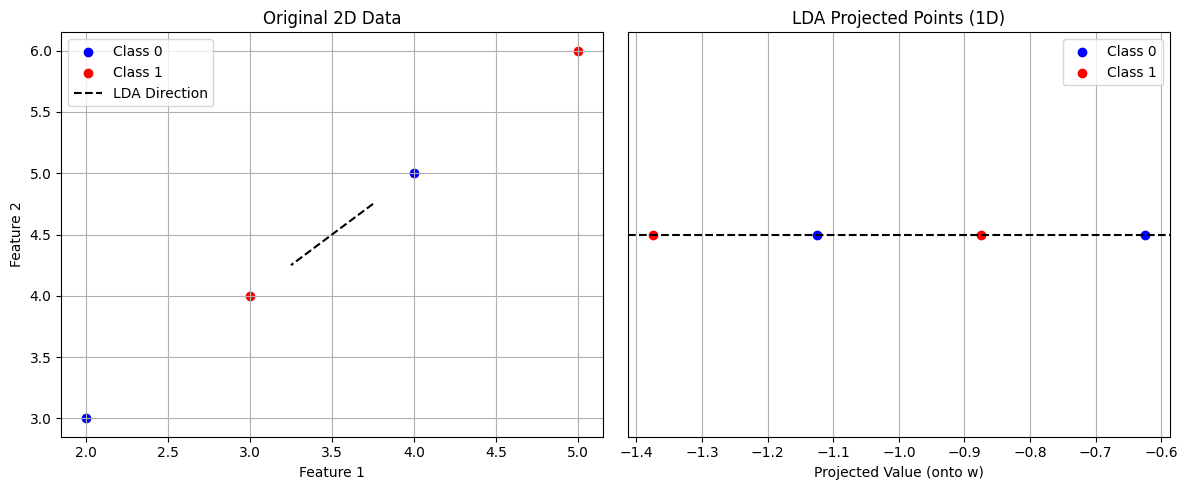

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Original 2D Data")
plt.scatter(X0[:, 0], X0[:, 1], color='blue', label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1], color='red', label="Class 1")

# Plot LDA direction vector
origin = np.mean(X, axis=0)
line = np.array([origin - w * 2, origin + w * 2])
plt.plot(line[:, 0], line[:, 1], 'k--', label="LDA Direction")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

# 2. Projected 1D data
plt.subplot(1, 2, 2)
plt.title("LDA Projected Points (1D)")
plt.scatter(X_lda[y == 0], [0]*len(X_lda[y == 0]), color='blue', label="Class 0")
plt.scatter(X_lda[y == 1], [0]*len(X_lda[y == 1]), color='red', label="Class 1")
plt.axhline(0, color='black', linestyle='--')
plt.yticks([])
plt.xlabel("Projected Value (onto w)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()